In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: C:\Users\Anil Rathod\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist


In [3]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Show dataset shape
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)


Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [4]:
# Normalize the images to range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape data to fit CNN input: (batch, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Number of classes
num_classes = 10


In [12]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 0.7656 - loss: 0.6573 - val_accuracy: 0.8782 - val_loss: 0.3430
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.8800 - loss: 0.3249 - val_accuracy: 0.8977 - val_loss: 0.2838
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.8992 - loss: 0.2729 - val_accuracy: 0.8947 - val_loss: 0.2830
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 0.9131 - loss: 0.2334 - val_accuracy: 0.9014 - val_loss: 0.2774
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9258 - loss: 0.1993 - val_accuracy: 0.9067 - val_loss: 0.2555
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.9332 - loss: 0.1753 - val_accuracy: 0.9118 - val_loss: 0.2463
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9441 - loss: 0.1524 - val_accuracy: 0.9107 - val_loss: 0.2553
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9492 -

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\nTest accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9071 - loss: 0.3134

Test accuracy: 0.9061999917030334


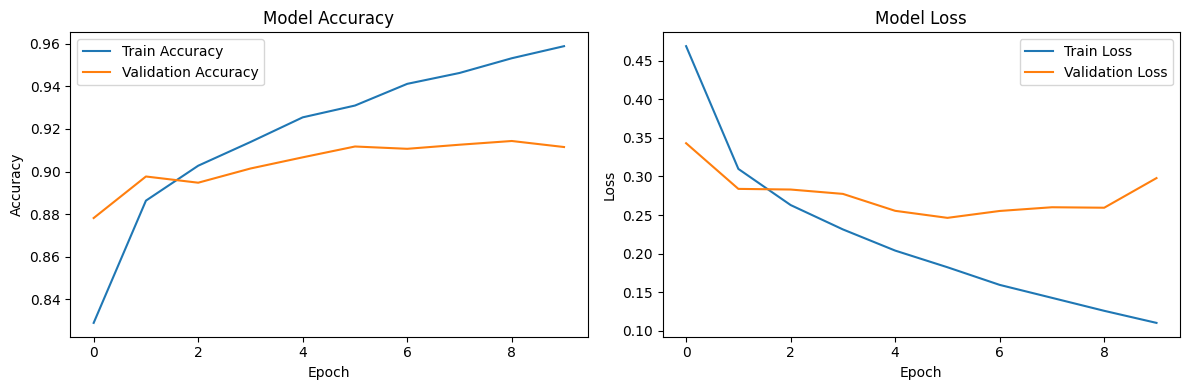

In [8]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# method 2 using csv for better understanding........

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Load the CSV file (use the correct path to your CSV file)
df = pd.read_csv('../Pract 3/fashion-mnist_test.csv')

# Separate features (pixel values) and labels (clothing categories)
X = df.drop('label', axis=1)  # Drop the label column to get pixel values
y = df['label']  # The label column (clothing categories)

# Reshape and normalize the data (reshape to 28x28x1 for CNN)
X = X.values.reshape(-1, 28, 28, 1) / 255.0  # Reshape to (28, 28, 1) and normalize

# One-hot encode the labels
y = to_categorical(y, 10)  # 10 classes for fashion categories

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 categories in Fashion MNIST
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model (using the same data for both training and testing)
history = model.fit(X, y, epochs=5, batch_size=64)

# Evaluate the model on the same data (as an example)
loss, accuracy = model.evaluate(X, y)
print(f"Model Accuracy: {accuracy}")


Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.5990 - loss: 1.1648
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.8126 - loss: 0.5129
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.8454 - loss: 0.4381
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.8691 - loss: 0.3746
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.8658 - loss: 0.3616
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8867 - loss: 0.3187
Model Accuracy: 0.8907999992370605
